In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv("blb_gaussian_mean.csv")

In [2]:
list_of_n = df.n.unique()
print(list_of_n)
estimates_std = []
standard_error = []

for n_val in list_of_n:
    estimates_std.append(np.std(df.loc[df.n==n_val, :]['estimator_mean']))
    standard_error.append(np.mean(df.loc[df.n==n_val, :]['estimator_variance']))

[ 250  500  750 1000 2500]


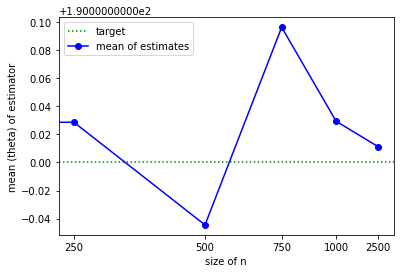

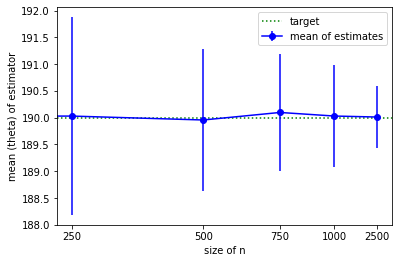

In [5]:
true_theta = 190
point_estimates = []
for n_val in list_of_n:
    point_estimates.append(np.mean(df.loc[df.n==n_val, :]['estimator_mean']))

#plot is cutting off first datapoint. Hardcoding the first "throwaway" datapoint
list_of_n_new = list_of_n.copy()
list_of_n_new=np.insert(list_of_n_new,0,0)

point_estimates_new = point_estimates.copy()
point_estimates_new.insert(0,190)
estimates_std_new = estimates_std.copy()
estimates_std_new.insert(0,0)

plt.xscale('log')
plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
plt.plot([str(e) for e in list_of_n_new], point_estimates_new, 
     marker='o', color='blue', label='mean of estimates')
plt.xlabel("size of n")
plt.ylabel("mean (theta) of estimator")
plt.legend()
plt.show()


plt.xscale('log')
plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
plt.errorbar([str(e) for e in list_of_n_new], point_estimates_new, 
     marker='o', color='blue', label='mean of estimates', yerr=estimates_std_new)
plt.xlabel("size of n")
plt.ylabel("mean (theta) of estimator")
plt.legend()
plt.show()

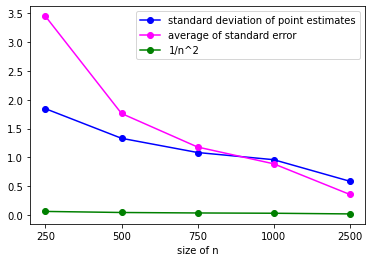

In [9]:
plt.plot([str(e) for e in list_of_n], estimates_std, 
         marker='o', color='blue', label='standard deviation of point estimates')
plt.plot([str(e) for e in list_of_n], standard_error, 
         marker='o', color='magenta', label='average of standard error')
plt.plot([str(e) for e in list_of_n], [(1/np.sqrt(e)) for e in list_of_n], 
         marker='o', color='green', label='1/sqrt(n)')
plt.xlabel("size of n")
plt.legend()
plt.show()

In [10]:
def construct_ci(alpha):

    ci_success_over_n = []
    ci_success_sd = []

    true_theta = 190


    index = 0
    for n_val in list_of_n:
        ci_success_trials = np.zeros(1000) #T
        for i in range(1000):
            theta = (df.loc[df.n==n_val, :]['estimator_mean'])[index]
            sigma_sq = (df.loc[df.n==n_val, :]['estimator_variance'])[index]
            index += 1        

            ci = st.norm.interval(alpha, loc=theta, scale=np.sqrt(sigma_sq))
            if ci[0] <= true_theta <= ci[1]:
                ci_success_trials[i] = 1
        ci_success_over_n.append(np.mean(ci_success_trials))
        ci_success_sd.append(np.std(ci_success_trials))
        
        
#     plt.xscale('log')
    plt.axhline(y=alpha, color='green', linestyle=':', label = 'target')
    plt.errorbar([str(e) for e in list_of_n], ci_success_over_n, 
                 marker='o', color='blue', label='CI success rate', yerr=ci_success_sd)
    plt.xlabel("size of n")
    plt.ylabel("alpha")
    plt.legend()
    plt.show()

    return(ci_success_over_n, ci_success_sd)

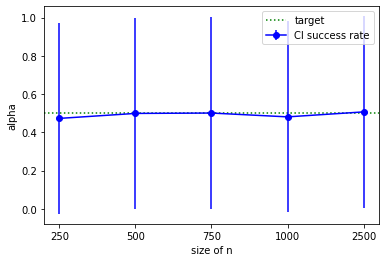

([0.473, 0.499, 0.501, 0.481, 0.507], [0.49927046778274403, 0.49999899999899994, 0.49999899999899994, 0.49963886958482323, 0.4999509975987647])


In [11]:
print(construct_ci(0.5))

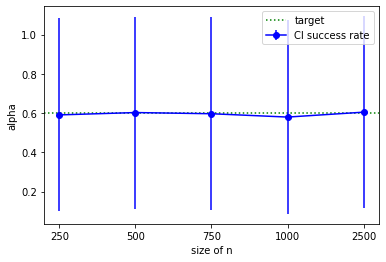

([0.591, 0.603, 0.597, 0.58, 0.605], [0.4916492652287807, 0.48927599573246994, 0.49050076452539815, 0.4935585071701227, 0.4888506929523574])


In [12]:
print(construct_ci(0.6))

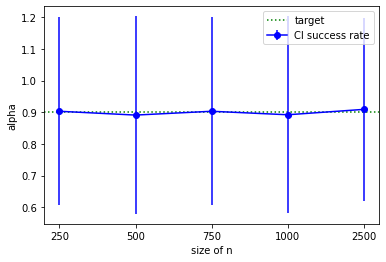

([0.903, 0.891, 0.903, 0.892, 0.909], [0.29595776725742473, 0.3116392144772541, 0.29595776725742473, 0.31038041175306147, 0.2876091097305508])


In [14]:
print(construct_ci(0.9))